# **Car Price Prediction Using Linear Regression**

-------------

## **Objective: To develop and evaluate a linear regression model (Ordinary Least Sqaure) that accurately predicts car prices based on a given dataset.**

--------------

## **Import Library**

In [268]:
import pandas as pd
import numpy as np

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

## **Import Data**

In [269]:
car = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Car%20Price.csv')

## **Explore Data**

**First Five Rows**

In [270]:
car.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


**Shape of the dataset**

In [271]:
car.shape

(4340, 9)

**Information of the dataset**

In [272]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4340 non-null   object
 1   Model          4340 non-null   object
 2   Year           4340 non-null   int64 
 3   Selling_Price  4340 non-null   int64 
 4   KM_Driven      4340 non-null   int64 
 5   Fuel           4340 non-null   object
 6   Seller_Type    4340 non-null   object
 7   Transmission   4340 non-null   object
 8   Owner          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


**Describe the dataset**

In [273]:
car.describe()

,Year,Selling_Price,KM_Driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


**Data Types in the dataset**

In [274]:
car.dtypes

Brand            object
Model            object
Year              int64
Selling_Price     int64
KM_Driven         int64
Fuel             object
Seller_Type      object
Transmission     object
Owner            object
dtype: object

**Identifying Missing Values**

In [275]:
car.isnull()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4335,False,False,False,False,False,False,False,False,False
4336,False,False,False,False,False,False,False,False,False
4337,False,False,False,False,False,False,False,False,False
4338,False,False,False,False,False,False,False,False,False


In [276]:
car.isnull().sum()

Brand            0
Model            0
Year             0
Selling_Price    0
KM_Driven        0
Fuel             0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

## **Data Preprocessing**

In [277]:
# Adding Age Column
car['Age'] = 2024 - car['Year']
car.drop('Year', axis=1, inplace=True)

In [278]:
car.head()

,Brand,Model,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner,Age
0,Maruti,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,17
1,Maruti,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,17
2,Hyundai,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,12
3,Datsun,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,7
4,Honda,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,10


**Outlier Visualization**

<Axes: xlabel='Selling_Price'>

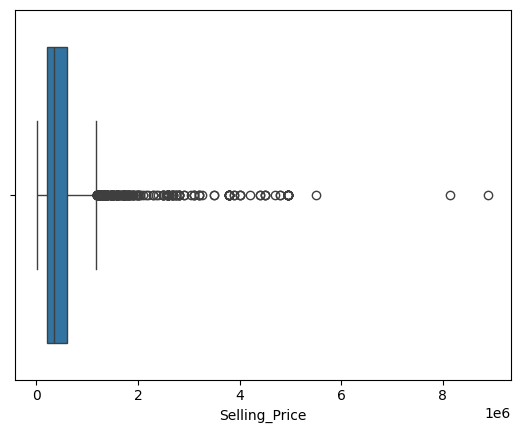

In [279]:
sns.boxplot(x='Selling_Price', data=car)

In [280]:
car1 = car.copy()
car1.shape

(4340, 9)

In [281]:
sorted(car1['Selling_Price'],reverse=True)

[8900000,
 8150000,
 5500000,
 4950000,
 4950000,
 4950000,
 4950000,
 4950000,
 4950000,
 4950000,
 4950000,
 4950000,
 4950000,
 4950000,
 4800000,
 4800000,
 4700000,
 4500000,
 4500000,
 4500000,
 4400000,
 4400000,
 4200000,
 4000000,
 4000000,
 4000000,
 3899000,
 3899000,
 3800000,
 3800000,
 3800000,
 3800000,
 3800000,
 3800000,
 3800000,
 3800000,
 3800000,
 3800000,
 3800000,
 3500000,
 3500000,
 3256000,
 3200000,
 3200000,
 3200000,
 3100000,
 3100000,
 3100000,
 3050000,
 2900000,
 2900000,
 2800000,
 2800000,
 2800000,
 2800000,
 2800000,
 2750000,
 2750000,
 2750000,
 2750000,
 2700000,
 2700000,
 2700000,
 2700000,
 2675000,
 2675000,
 2650000,
 2600000,
 2600000,
 2600000,
 2600000,
 2600000,
 2600000,
 2600000,
 2600000,
 2600000,
 2600000,
 2600000,
 2600000,
 2600000,
 2595000,
 2575000,
 2550000,
 2500000,
 2500000,
 2500000,
 2500000,
 2490000,
 2400000,
 2349000,
 2300000,
 2300000,
 2200000,
 2150000,
 2100000,
 2050000,
 2050000,
 2000000,
 2000000,
 2000000,


In [282]:
out1 = car1[(car1['Selling_Price']>=8000000) & (car1['Selling_Price']<=9000000)]
out1

,Brand,Model,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner,Age
89,Mercedes-Benz,Mercedes-Benz S-Class S 350d Connoisseurs Edition,8150000,6500,Diesel,Dealer,Automatic,First Owner,7
3872,Audi,Audi RS7 2015-2019 Sportback Performance,8900000,13000,Petrol,Dealer,Automatic,First Owner,8


In [283]:
outlier1 = car1[~(car1['Selling_Price']>=8000000) & (car1['Selling_Price']<=9000000)]
car = outlier1.copy()
car.shape

(4338, 9)

<Axes: xlabel='KM_Driven'>

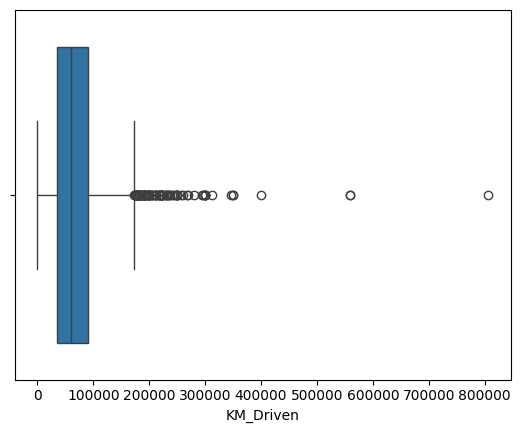

In [284]:
sns.boxplot(x='KM_Driven', data=car)

In [285]:
car2 = car.copy()
car2.shape

(4338, 9)

In [286]:
sorted(car1['KM_Driven'],reverse=True)

[806599,
 560000,
 560000,
 400000,
 350000,
 350000,
 347089,
 312000,
 300000,
 300000,
 300000,
 300000,
 300000,
 296823,
 295000,
 280000,
 270000,
 267000,
 260000,
 256000,
 250000,
 250000,
 250000,
 250000,
 250000,
 245244,
 244000,
 240000,
 238000,
 235000,
 235000,
 234000,
 230000,
 230000,
 230000,
 230000,
 224642,
 223660,
 223000,
 223000,
 222435,
 222252,
 221000,
 220000,
 220000,
 220000,
 218000,
 218000,
 217871,
 213000,
 213000,
 212814,
 210000,
 210000,
 206500,
 205000,
 205000,
 200000,
 200000,
 200000,
 200000,
 200000,
 200000,
 200000,
 200000,
 200000,
 200000,
 200000,
 200000,
 200000,
 200000,
 200000,
 200000,
 197000,
 195000,
 195000,
 195000,
 192000,
 190621,
 190000,
 190000,
 190000,
 190000,
 190000,
 190000,
 186000,
 186000,
 186000,
 185000,
 185000,
 185000,
 182000,
 181000,
 180000,
 180000,
 180000,
 180000,
 180000,
 180000,
 180000,
 180000,
 180000,
 178000,
 175900,
 175000,
 175000,
 175000,
 175000,
 175000,
 173000,
 172000,
 

In [287]:
out2 = car2[(car2['KM_Driven']>=550000) & (car2['KM_Driven']<=900000)]
out2

,Brand,Model,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner,Age
525,Maruti,Maruti SX4 S Cross DDiS 320 Delta,665000,560000,Diesel,Dealer,Manual,First Owner,8
1243,Maruti,Maruti Swift VXI BSIII,250000,806599,Petrol,Dealer,Manual,First Owner,15
4184,Maruti,Maruti SX4 S Cross DDiS 320 Delta,665000,560000,Diesel,Dealer,Manual,First Owner,8


In [288]:
outlier2 = car2[~(car2['KM_Driven']>=550000) & (car2['KM_Driven']<=900000)]
car = outlier2.copy()
car.shape

(4335, 9)

<Axes: xlabel='Age'>

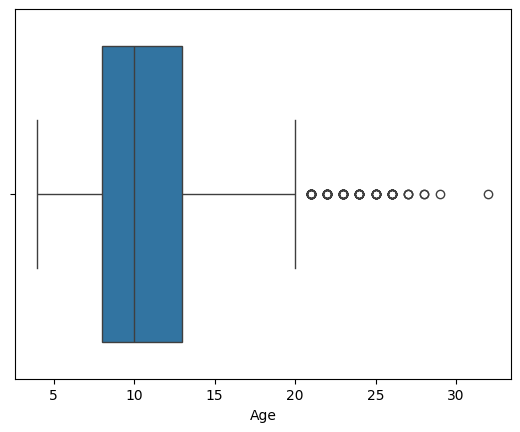

In [289]:
sns.boxplot(x='Age', data=car)

In [290]:
car3 = car.copy()
car3.shape

(4335, 9)

In [291]:
sorted(car2['Age'],reverse=True)

[32,
 29,
 28,
 28,
 27,
 27,
 27,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,


In [292]:
out3 = car3[(car2['Age']>=30) & (car2['Age']<=40)]
out3

<ipython-input-292-bf3d5f4630d2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  out3 = car3[(car2['Age']>=30) & (car2['Age']<=40)]


,Brand,Model,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner,Age
3334,Maruti,Maruti 800 AC BSII,50000,100000,Petrol,Individual,Manual,Fourth & Above Owner,32


In [293]:
outlier3 = car3[~(car2['Age']>=30) & (car2['Age']<=40)]
car = outlier3.copy()
car.shape

<ipython-input-293-aa8e5c32287c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier3 = car3[~(car2['Age']>=30) & (car2['Age']<=40)]


(4334, 9)

## **Data Visualization**

<ipython-input-294-ad493a25970d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Seller_Type', y='Selling_Price', data=car, palette='muted')
<ipython-input-294-ad493a25970d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Transmission', y='Selling_Price', data=car, palette='muted')
<ipython-input-294-ad493a25970d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fuel', y='Selling_Price', data=car, palette='muted')


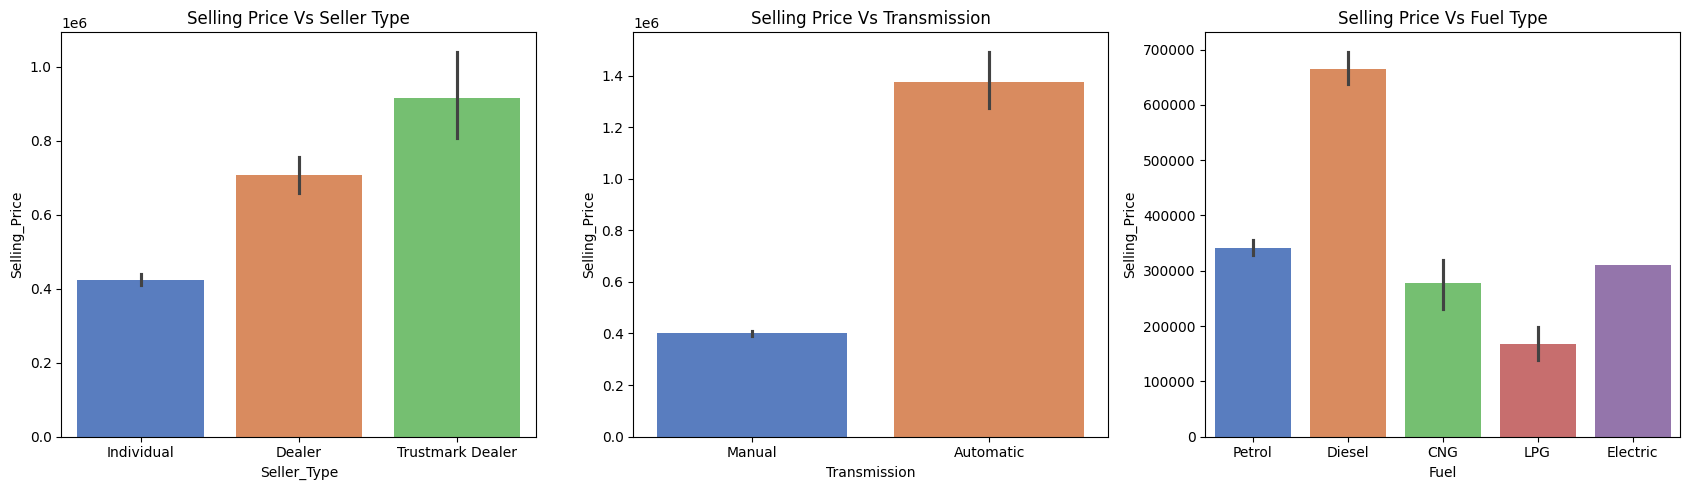

In [294]:
#Seller Type, Transmission and Fuel Type Visualization with target variable

plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.barplot(x='Seller_Type', y='Selling_Price', data=car, palette='muted')
plt.title('Selling Price Vs Seller Type')

plt.subplot(1,3,2)
sns.barplot(x='Transmission', y='Selling_Price', data=car, palette='muted')
plt.title('Selling Price Vs Transmission')

plt.subplot(1,3,3)
sns.barplot(x='Fuel', y='Selling_Price', data=car, palette='muted')
plt.title('Selling Price Vs Fuel Type')

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

<ipython-input-295-3501a3aee2cb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Owner', y='Selling_Price', data=car, palette='deep')


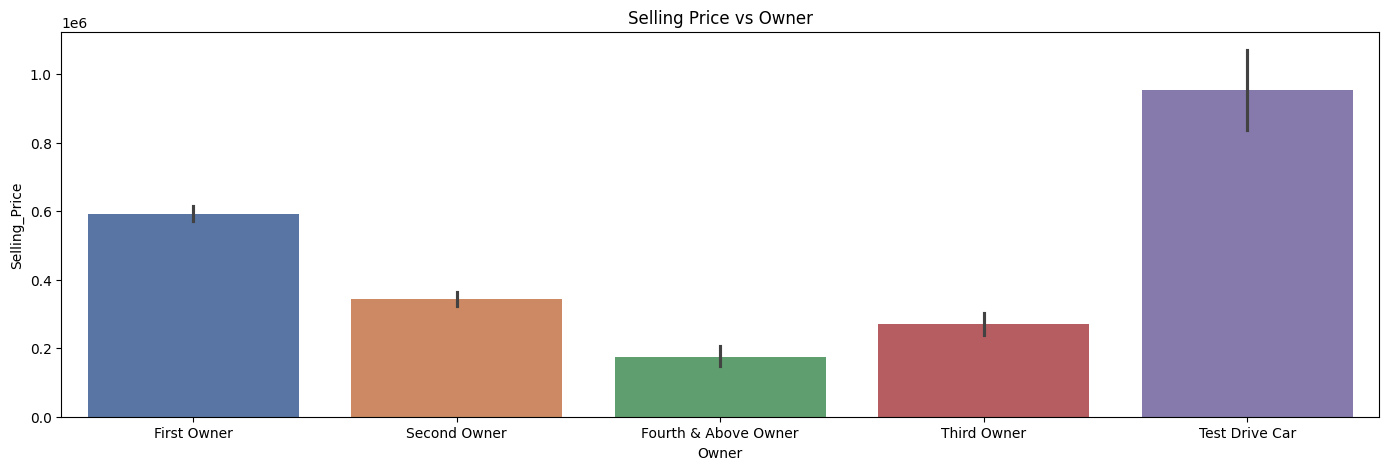

In [295]:
#Selling_Price and Owner Visualization with target variable
plt.figure(figsize=[17,5])
sns.barplot(x='Owner', y='Selling_Price', data=car, palette='deep')
plt.title('Selling Price vs Owner')
plt.show()

<ipython-input-296-bbc214571c52>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Selling_Price', data=car, palette='colorblind')


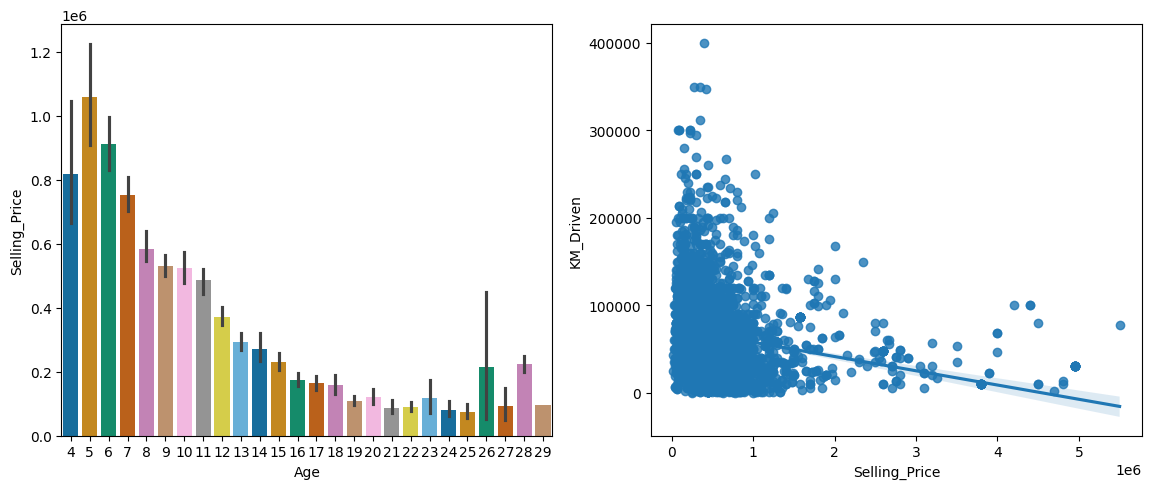

In [296]:
plt.figure(figsize=[17,5])
# Selling Price vs Age
plt.subplot(1,3,2)
sns.barplot(x='Age', y='Selling_Price', data=car, palette='colorblind')

# Selling Price vs Kms Driven
plt.subplot(1,3,3)
sns.regplot(x='Selling_Price', y='KM_Driven', data=car)

plt.tight_layout() # Adjust layout and display plots
plt.show()

**Encoding of Categorical Features**

In [297]:
car.head()

,Brand,Model,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner,Age
0,Maruti,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,17
1,Maruti,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,17
2,Hyundai,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,12
3,Datsun,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,7
4,Honda,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,10


In [298]:
car = car.drop(['Model', 'Brand'], axis=1)

In [299]:
car.replace({'Fuel':{'Petrol':0, 'Diesel':1, 'CNG':2, 'LPG':3, 'Electric':4}},inplace=True)
car['Fuel'].unique()

array([0, 1, 2, 3, 4])

In [300]:
car.replace({'Seller_Type':{'Individual':0, 'Dealer':1, 'Trustmark Dealer':2}},inplace=True)
car['Seller_Type'].unique()

array([0, 1, 2])

In [301]:
car.replace({'Transmission':{'Manual':0, 'Automatic':1}},inplace=True)
car['Transmission'].unique()

array([0, 1])

In [302]:
car.replace({'Owner':{'First Owner':0, 'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)
car['Owner'].unique()

array([0, 1, 3, 2, 4])

In [303]:
car.head()

,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner,Age
0,60000,70000,0,0,0,0,17
1,135000,50000,0,0,0,0,17
2,600000,100000,1,0,0,0,12
3,250000,46000,0,0,0,0,7
4,450000,141000,1,0,0,1,10


**Correlation Visualization**

In [304]:
corr_matrix = car.corr()
corr_matrix

,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner,Age
Selling_Price,1.000000,-0.204688,0.238117,0.242549,0.536827,-0.203761,-0.428562
KM_Driven,-0.204688,1.000000,0.291016,-0.210934,-0.122869,0.296163,0.444900
Fuel,0.238117,0.291016,1.000000,0.011045,0.027640,0.016206,-0.089099
Seller_Type,0.242549,-0.210934,0.011045,1.000000,0.199169,-0.210216,-0.181960
Transmission,0.536827,-0.122869,0.027640,0.199169,1.000000,-0.083250,-0.143104
Owner,-0.203761,0.296163,0.016206,-0.210216,-0.083250,1.000000,0.408182
Age,-0.428562,0.444900,-0.089099,-0.181960,-0.143104,0.408182,1.000000


<Axes: >

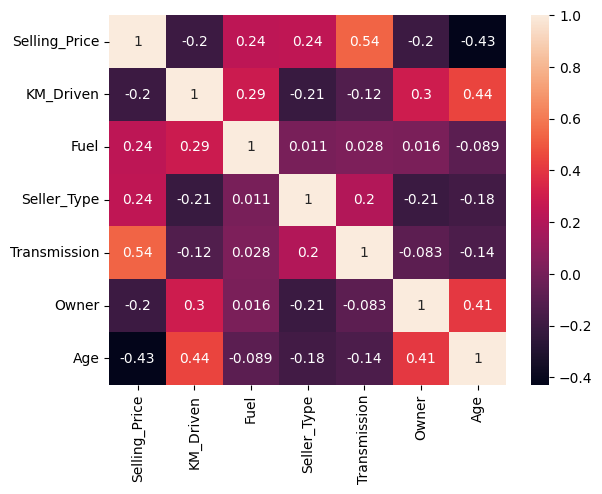

In [305]:
sns.heatmap(corr_matrix, annot=True)

## **Define Target Variable (y) and Feature Variables (X)**

In [306]:
car.columns

Index(['Selling_Price', 'KM_Driven', 'Fuel', 'Seller_Type', 'Transmission',
       'Owner', 'Age'],
      dtype='object')

In [307]:
Y = car['Selling_Price']
X = car.drop('Selling_Price', axis=1)

## **Train Test Split**

In [308]:
from sklearn.model_selection import train_test_split

In [309]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2529)

In [310]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((3033, 6), (1301, 6), (3033,), (1301,))

## **Modeling**

In [311]:
from sklearn.linear_model import LinearRegression

In [312]:
model = LinearRegression()

In [313]:
model.fit(X_train,Y_train)

LinearRegression()

In [314]:
model.intercept_

766482.9559403949

In [315]:
model.coef_

array([-8.88871781e-01,  2.19480839e+05,  8.46114149e+04,  8.88452999e+05,
       -6.60874708e+03, -3.94660998e+04])

## **Prediction**

In [316]:
Y_pred = model.predict(X_test)

In [317]:
Y_pred

array([ 379644.41541946,  298663.4102668 ,  518917.53892028, ...,
        160625.25248382, -127223.68218332,  -74393.60250421])

In [318]:
Y_pred.shape

(1301,)

## **Model Evaluation**

In [319]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [320]:
MSE = mean_squared_error(Y_test, Y_pred)
print('Test Mean Squared Error for test data: ', MSE)

Test Mean Squared Error for test data:  128183858115.75652


In [321]:
MAE = mean_absolute_error(Y_test, Y_pred)
print('Test Mean Absolute Error for test data: ', MAE)

Test Mean Absolute Error for test data:  216308.02510601122


In [322]:
R2 = r2_score(Y_test, Y_pred)
print('Test R2 Score for test data: ', R2)

Test R2 Score for test data:  0.4620905272310253


## **Actual vs Predicted Results**

In [323]:
result = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
result

,Actual,Predicted
2100,229999,379644.415419
42,229999,298663.410267
47,560000,518917.538920
2057,140000,224059.987110
189,390000,468887.334896
...,...,...
905,625000,569917.314123
4175,556000,547819.534413
661,140000,160625.252484
1732,120000,-127223.682183


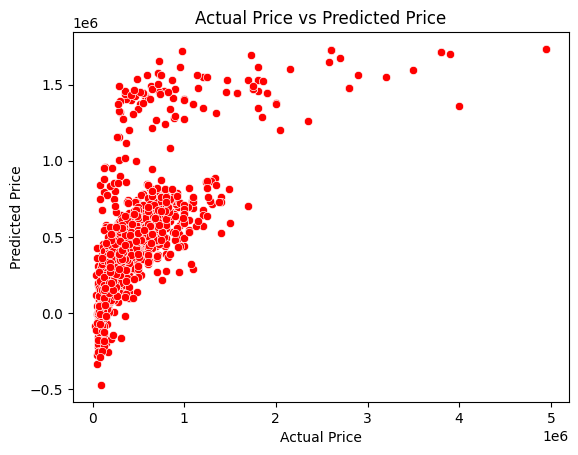

In [324]:
sns.scatterplot(x=Y_test, y=Y_pred,color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()